# Linear Regression 

### Step 1: Data Preparation

In [181]:
import numpy as np
import pandas as pd


In [182]:
data = pd.read_csv('Advertising.csv', index_col=0)

In [183]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Step 2: Add Bias

In [218]:
X = data[['TV', 'Radio', 'Newspaper']].values
y = np.array(data['Sales']).reshape(-1, 1)

In [219]:
X.mean(), X.std()

(66.9535, 76.7535047261687)

In [220]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std


In [221]:
# Adding bias
X = np.c_[np.ones((X.shape[0], 1)), X]

In [222]:
X.mean(), X.std()

(0.24999999999999997, 0.9682458365518543)

In [223]:
X.shape, y.shape

((200, 4), (200, 1))

In [224]:
# Splitting the data into training and testing sets (80-20 split)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [225]:
X_train.shape, y_train.shape

((160, 4), (160, 1))

### Step 3: Hypothesis Function


In [226]:
def hypothesis(X, theta):
    
    result = np.dot(X, theta)  
    
    return result



### Step 4: Cost Function


In [227]:
def compute_cost(X, y, theta):
    
    m = len(y)
    
    cost = np.sum(np.square(hypothesis(X, theta) - y))/(2 * m)
    
    return cost

### Step 5: Gradient Descent

In [228]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        
        h = hypothesis(X, theta)                     # Get the predictions
        error = h - y                                # Get the error vector
        gradients = (1/m) * X.T.dot(error)           # Compute the gradients
        theta = theta - learning_rate * gradients    # Update the parameters
        cost_history[i] = compute_cost(X, y, theta)  # Compute and record the cost
    
    return theta, cost_history

### Step 6: Training the Model


In [229]:
theta = np.zeros((X_train.shape[1], 1))



In [230]:
m = X_train.shape[1]
theta = np.zeros((m, 1))

learning_rate = 0.01
iterations = 2000 

theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

### Step 7: Plot the Convergence of the Gradient Descent


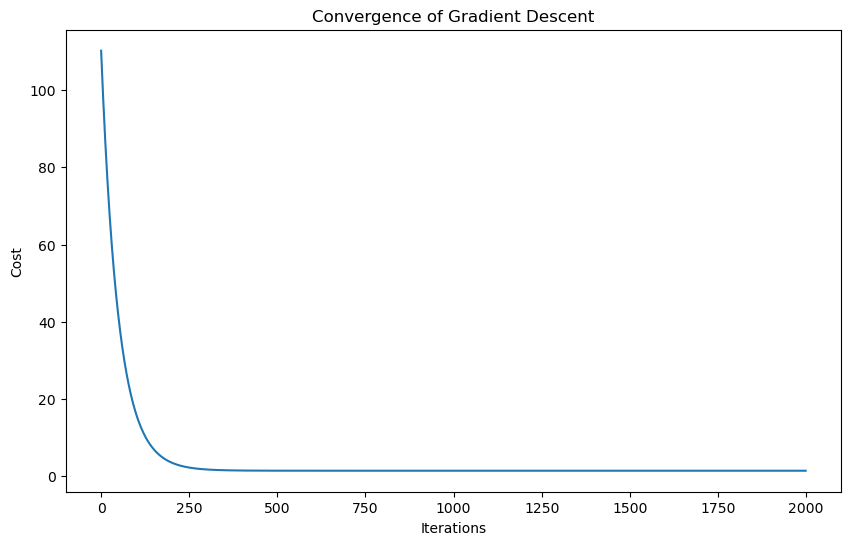

In [231]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.show()

### Step 8: Testing the Model

In [240]:
predictions = hypothesis(X_test, theta)